In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [16]:
df = pd.read_csv('state_data.csv', index_col=0)

df["winner"] = df['Election Result'].apply(lambda x: 1 if x > 0 else 0)

df.drop(columns=["Election Result"], inplace=True)

In [17]:
df.head()

,total population,% White,% Black,% Asian,% Hispanic,Union Membership,Urbanization,% Buddhist,% Jewish,% Hindu,% Muslim,% Christian,% with College Degree,Median Age,winner
state,,,,,,,,,,,,,,,
Alabama,5108468,64.7,25.4,2.1,5.7,7.5,57.7,1.0,1.0,1.0,1.0,88.0,26.703532,39.5,1
Alaska,733406,59.6,2.9,9.1,7.5,14.8,64.9,1.0,1.0,1.0,1.0,64.0,28.979858,36.1,1
Arizona,7431344,58.3,4.8,5.3,31.6,4.2,89.3,1.0,2.0,1.0,1.0,67.0,30.853004,39.2,1
Arkansas,3067732,68.9,14.4,2.2,9.1,5.1,55.5,1.0,1.0,1.0,2.0,81.0,24.298995,38.7,1
California,38965193,38.5,5.4,18.4,40.4,15.4,94.2,2.0,2.0,2.0,1.0,63.0,34.639426,38.2,0


In [18]:
X = df.drop(columns=["winner"])
y = df["winner"]

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.797054,-1.914880,3.066654,0.040358,-0.122920,-0.068014,1.799566,-0.160450,2.618097,-0.234888,2.524578,-0.932093,4.405278,-2.023399
1,-0.088803,0.852481,-0.491342,-0.285954,-0.508548,-0.432017,-0.391170,-0.160450,-0.505247,-0.234888,-0.274411,-0.032749,-0.266836,0.568942
2,-0.399311,-0.184438,0.016943,-0.022394,0.529681,1.387997,0.887314,-0.160450,1.056425,-0.234888,-0.274411,-0.161227,1.097175,0.887299
3,0.168660,-0.137305,-0.684491,0.881239,0.134165,1.516468,0.694210,-0.160450,-0.505247,-0.234888,-0.274411,-1.317527,0.710375,-0.386131
4,4.385735,-1.935079,-0.542171,1.546414,2.685241,1.280937,1.413358,0.862418,0.275589,2.759935,-0.274411,-1.189049,0.238881,-0.522570


In [20]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3.240253,-1.315622,0.159263,0.090560,2.625913,-1.052963,0.714186,-0.16045,-0.505247,-0.234888,-0.274411,0.481162,-0.274390,-1.659562
1,-0.161551,-0.245037,1.389313,-0.449110,-0.577763,-1.524025,-0.337900,-0.16045,-0.505247,-0.234888,-0.274411,0.866595,-0.416113,0.477982
2,0.290874,-0.500900,0.779371,0.341569,-0.211911,-1.095787,0.174825,-0.16045,-0.505247,-0.234888,-0.274411,0.224206,0.957502,-0.067774
3,-0.623002,0.973679,-1.009793,-0.411458,0.055062,-1.052963,-0.251336,-0.16045,-0.505247,-0.234888,-0.274411,-0.418182,-0.637737,-0.795448
4,-0.491022,-0.783696,2.527871,-0.562064,-0.943615,-0.517665,-1.776195,-0.16045,-0.505247,-0.234888,-0.274411,1.508984,-1.494495,-0.295172


In [21]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}

gridSearch = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)

gridSearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [22]:
best_model = gridSearch.best_estimator_

y_pred = best_model.predict(X_test)

In [23]:
print("Ideal Paramaters: ", gridSearch.best_params_)
print("Testing Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Ideal Paramaters:  {'C': 1, 'kernel': 'linear'}
Testing Accuracy:  0.9090909090909091
Confusion Matrix: 
 [[4 1]
 [0 6]]


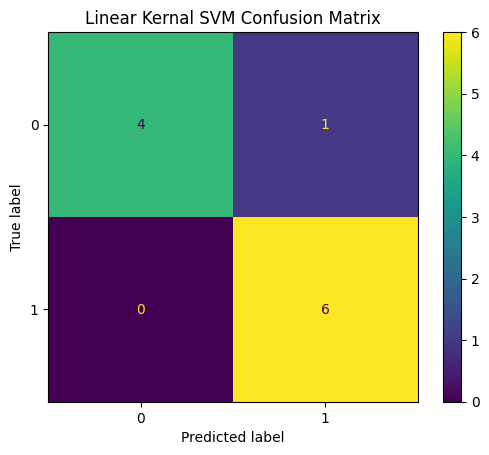

In [24]:
# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.title("Linear Kernal SVM Confusion Matrix")
plt.show()

In [25]:
kernals = param_grid['kernel']
best_estimators = {}
for kernal in kernals:
    idx = np.array(gridSearch.cv_results_['param_kernel'] == kernal)

    mean_test_score = np.array(gridSearch.cv_results_['mean_test_score'][idx])
    params = np.array(gridSearch.cv_results_['params'])[idx]

    est = np.argmax(mean_test_score)

    best_estimators[kernal] = params[est]

In [26]:
best_estimators

{'linear': {'C': 1, 'kernel': 'linear'},
 'poly': {'C': 100, 'kernel': 'poly'},
 'rbf': {'C': 1, 'kernel': 'rbf'},
 'sigmoid': {'C': 1, 'kernel': 'sigmoid'}}

Testing Accuracy:  0.7272727272727273


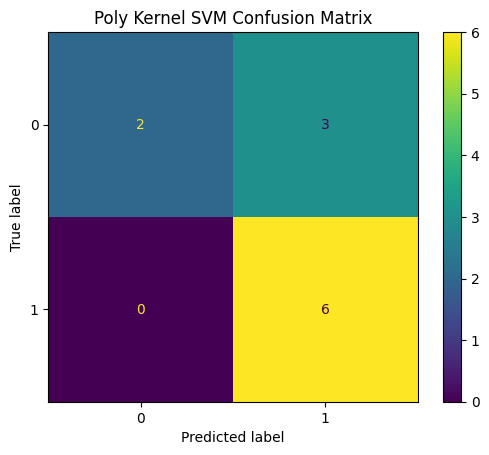

In [27]:
poly_model = SVC(**best_estimators['poly'])
poly_model.fit(X_train, y_train)
y_pred = poly_model.predict(X_test)

print("Testing Accuracy: ", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=poly_model.classes_)

disp.plot()
plt.title("Poly Kernel SVM Confusion Matrix")
plt.show()

Testing Accuracy:  0.7272727272727273


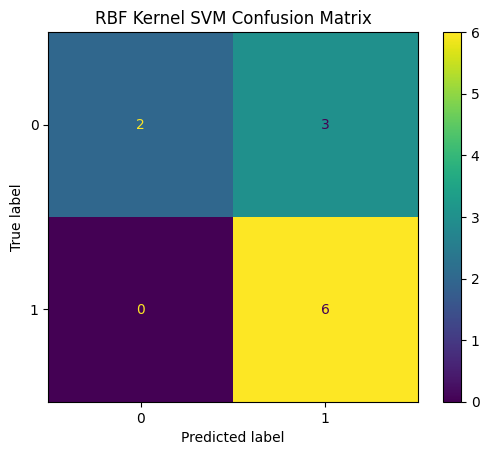

In [28]:
rbf_model = SVC(**best_estimators['rbf'])
rbf_model.fit(X_train, y_train)
y_pred = rbf_model.predict(X_test)

print("Testing Accuracy: ", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rbf_model.classes_)
disp.plot()
plt.title("RBF Kernel SVM Confusion Matrix")
plt.show()